In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('pokemon_data.csv')
df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
print(df.iloc[1:4,:3])

   #                   Name Type 1
1  2                Ivysaur  Grass
2  3               Venusaur  Grass
3  3  VenusaurMega Venusaur  Grass


In [28]:
df[(df['Legendary']== True) & (df['Type 1']== 'Water') ][['Name','Legendary']]

,Name,Legendary
264,Suicune,True
421,Kyogre,True
422,KyogrePrimal Kyogre,True
541,Palkia,True


In [52]:
spd = df[['Type 1','Speed']]
spd.groupby('Type 1').mean()

,Speed
Type 1,
Bug,61.681159
Dark,76.161290
Dragon,83.031250
Electric,84.500000
Fairy,48.588235
Fighting,66.074074
Fire,74.442308
Flying,102.500000
Ghost,64.343750


In [46]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [56]:
df['Type 2'].isnull()

TypeError: isnull() takes 1 positional argument but 2 were given

In [84]:
Type1_only = df[df['Type 2'].isnull() == True][['Name','Type 1']]
Type1_only

,Name,Type 1
4,Charmander,Fire
5,Charmeleon,Fire
9,Squirtle,Water
10,Wartortle,Water
11,Blastoise,Water
...,...,...
775,Sliggoo,Dragon
776,Goodra,Dragon
788,Bergmite,Ice
789,Avalugg,Ice


In [86]:
df[['Legendary','Sp. Atk']].corr()

,Legendary,Sp. Atk
Legendary,1.000000,0.448907
Sp. Atk,0.448907,1.000000


In [46]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [29]:
Less_100 = df[df['HP']<= 100][['Type 1','Legendary','HP']]
Less_100.groupby(['Type 1','Legendary']).mean()

HP
Type 1   Legendary           
Bug      False      56.884058
Dark     False      63.035714
         True       70.000000
Dragon   False      68.722222
         True       86.666667
Electric False      57.325000
         True       84.500000
Fairy    False      68.866667
Fighting False      63.208333
Fire     False      64.386364
         True       87.000000
Flying   False      62.500000
         True       79.000000
Ghost    False      55.586207
Grass    False      64.323077
         True       97.000000
Ground   False      62.434783
         True       94.500000
Ice      False      66.900000
         True       85.000000
Normal   False      66.361446
Poison   False      64.423077
Psychic  False      60.923077
         True       69.000000
Rock     False      63.641026
         True       67.750000
Steel    False      60.434783
         True       92.750000
Water    False      65.707071
         True       97.500000

In [28]:
Less_100.pivot_table(values =['HP'],columns=['Type 1'], index=['Legendary'])

HP                                                       \
Type 1           Bug       Dark     Dragon Electric      Fairy   Fighting   
Legendary                                                                   
False      56.884058  63.035714  68.722222   57.325  68.866667  63.208333   
True             NaN  70.000000  86.666667   84.500        NaN        NaN   

                                                                               \
Type 1          Fire Flying      Ghost      Grass     Ground   Ice     Normal   
Legendary                                                                       
False      64.386364   62.5  55.586207  64.323077  62.434783  66.9  66.361446   
True       87.000000   79.0        NaN  97.000000  94.500000  85.0        NaN   

                                                                  
Type 1        Poison    Psychic       Rock      Steel      Water  
Legendary                                                         
False      64.423077  60.923077  63.641026  60.434783  65.707071  
True             NaN  69.000000  67.750000  92.750000  97.500000

In [51]:
pokemon = df[['Name','Type 1','Attack','Defense','Speed']]
pokemon.head(10)


,Name,Type 1,Attack,Defense,Speed
0,Bulbasaur,Grass,49,49,45
1,Ivysaur,Grass,62,63,60
2,Venusaur,Grass,82,83,80
3,VenusaurMega Venusaur,Grass,100,123,80
4,Charmander,Fire,52,43,65
5,Charmeleon,Fire,64,58,80
6,Charizard,Fire,84,78,100
7,CharizardMega Charizard X,Fire,130,111,100
8,CharizardMega Charizard Y,Fire,104,78,100
9,Squirtle,Water,48,65,43


In [7]:
pokemon.sort_values(['Speed'], ascending = False)

,Name,Type 1,Attack,Defense,Speed
431,DeoxysSpeed Forme,Psychic,95,90,180
315,Ninjask,Bug,90,45,160
428,DeoxysNormal Forme,Psychic,150,50,150
154,AerodactylMega Aerodactyl,Rock,135,85,150
71,AlakazamMega Alakazam,Psychic,50,65,150
...,...,...,...,...,...
658,Ferroseed,Grass,50,91,10
486,Bonsly,Rock,80,95,10
359,Trapinch,Ground,100,45,10
230,Shuckle,Bug,10,230,5


In [8]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [9]:
Grass_Type = pokemon[pokemon['Type 1'] == 'Grass'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_GrassType = pd.DataFrame(Grass_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type

In [10]:
Fastest_GrassType

,275
Name,SceptileMega Sceptile
Type 1,Grass
Attack,110
Defense,75
Speed,145


In [11]:
Fire_Type = pokemon[pokemon['Type 1'] == 'Fire'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_FireType = pd.DataFrame(Fire_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_FireType

,731
Name,Talonflame
Type 1,Fire
Attack,81
Defense,71
Speed,126


In [12]:
Water_Type = pokemon[pokemon['Type 1'] == 'Water'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_WaterType = pd.DataFrame(Water_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_WaterType

,726
Name,Greninja
Type 1,Water
Attack,95
Defense,67
Speed,122


In [14]:
Electric_Type = pokemon[pokemon['Type 1'] == 'Electric'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_ElectricType = pd.DataFrame(Electric_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_ElectricType

,109
Name,Electrode
Type 1,Electric
Attack,50
Defense,70
Speed,140


In [20]:
Bug_Type = pokemon[pokemon['Type 1'] == 'Bug'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_BugType = pd.DataFrame(Bug_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_BugType

,315
Name,Ninjask
Type 1,Bug
Attack,90
Defense,45
Speed,160


In [45]:
Normal_Type = pokemon[pokemon['Type 1'] == 'Normal'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_NormalType = pd.DataFrame(Normal_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_NormalType

,476
Name,LopunnyMega Lopunny
Type 1,Normal
Attack,136
Defense,94
Speed,135


In [54]:
Poison_Type = pokemon[pokemon['Type 1'] == 'Poison'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_PoisonType = pd.DataFrame(Poison_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_PoisonType

,183
Name,Crobat
Type 1,Poison
Attack,90
Defense,80
Speed,130


In [55]:
Fastest_Types = Fastest_ElectricType.join(Fastest_FireType).join(Fastest_GrassType).join(Fastest_WaterType).join(Fastest_BugType).join(Fastest_NormalType).join()
Fastest_Types



,109,731,275,726,315,476,183
Name,Electrode,Talonflame,SceptileMega Sceptile,Greninja,Ninjask,LopunnyMega Lopunny,Crobat
Type 1,Electric,Fire,Grass,Water,Bug,Normal,Poison
Attack,50,81,110,95,90,136,90
Defense,70,71,75,67,45,94,80
Speed,140,126,145,122,160,135,130


,109,731,275,726,315,476,183
Name,Electrode,Talonflame,SceptileMega Sceptile,Greninja,Ninjask,LopunnyMega Lopunny,Crobat
Type 1,Electric,Fire,Grass,Water,Bug,Normal,Poison
Defense,70,71,75,67,45,94,80
Speed,140,126,145,122,160,135,130


In [9]:
df['Total'] = df.iloc[:,4:10].sum(axis=1)
#Here we have added the values from collumn HP to Speed to create our total
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


In [10]:
df['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [15]:
df[df['Generation']==6]['Generation'].count()
# He we have filtered the data frame by pokemon who are of the sixth generation

82

In [85]:
Gen_Six = df[df['Generation']==6][['Name', 'Type 1', 'Total','Generation','HP','Attack','Speed']]
Gen_Six.head(10)

,Name,Type 1,Total,Generation,HP,Attack,Speed
718,Chespin,Grass,313,6,56,61,38
719,Quilladin,Grass,405,6,61,78,57
720,Chesnaught,Grass,530,6,88,107,64
721,Fennekin,Fire,307,6,40,45,60
722,Braixen,Fire,409,6,59,59,73
723,Delphox,Fire,534,6,75,69,104
724,Froakie,Water,314,6,41,56,71
725,Frogadier,Water,405,6,54,63,97
726,Greninja,Water,530,6,72,95,122
727,Bunnelby,Normal,237,6,38,36,57


Text(0.5, 1.0, 'Generation 6 Pokemon ')

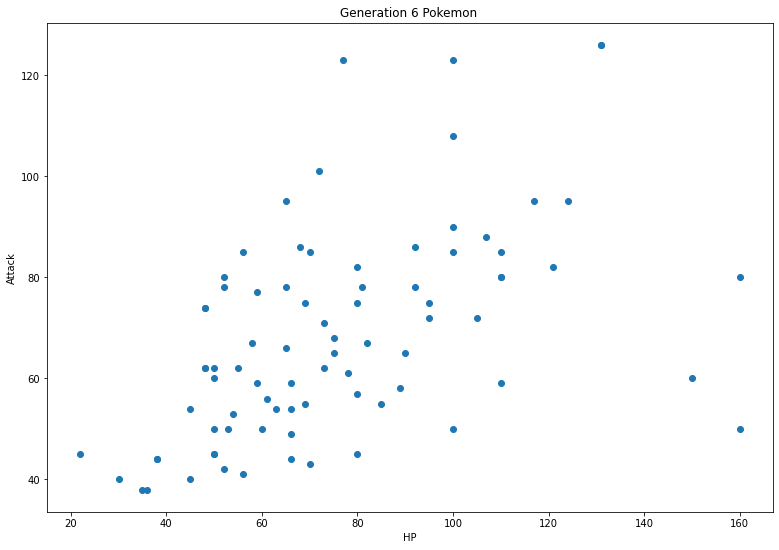

In [89]:
fig,axes = plt.subplots(figsize=(13,9))
axes.scatter(Gen_Six['Attack'],Gen_Six['HP'])
axes.set_ylabel('Attack')
axes.set_xlabel('HP')
axes.set_title('Generation 6 Pokemon ')

In [38]:
total_type = df[['Type 1', 'HP']].groupby('Type 1').mean()
total_type.head(10)

,HP
Type 1,
Bug,56.884058
Dark,66.806452
Dragon,83.312500
Electric,59.795455
Fairy,74.117647
Fighting,69.851852
Fire,69.903846
Flying,70.750000
Ghost,64.437500


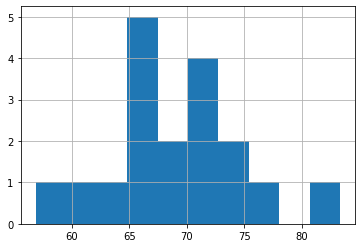

In [29]:
total_type['HP'].hist()

In [30]:
total_type = total_type.pivot_table(columns='Type 1',values='HP')
total_type.head(3)

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
HP,56.884058,66.806452,83.3125,59.795455,74.117647,69.851852,69.903846,70.75,64.4375,67.271429,73.78125,72.0,77.27551,67.25,70.631579,65.363636,65.222222,72.0625


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525


In [59]:
by_type = df[['Type 1', 'Legendary']]
by_type = by_type.groupby(['Type 1']).count()
by_type.head(18)

,Legendary
Type 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,27
Fire,52
Flying,4
Ghost,32


Text(0.5, 0, 'Pokemon Type 1')

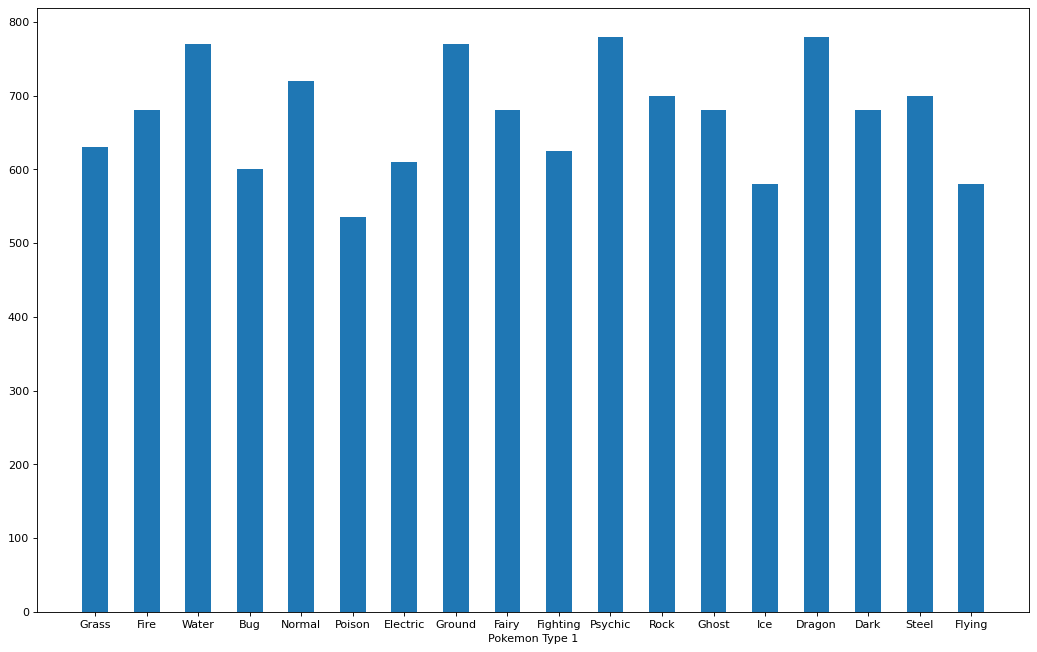

In [71]:
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['Type 1'], df['Total'], width=.5)
plt.xlabel('Pokemon Type 1')

In [75]:
np.random.rand(1,2)

array([[0.62680764, 0.01142144]])

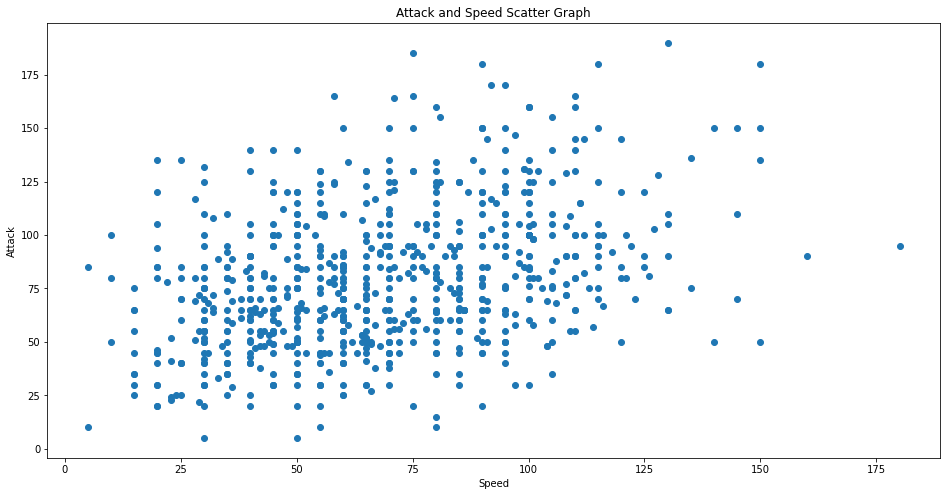

In [84]:
fig,axes = plt.subplots(figsize=(16,8))
axes.scatter(df['Speed'],df['Attack'] )
axes.set_xlabel('Speed')
axes.set_ylabel('Attack')
axes.set_title('Attack and Speed Scatter Graph')
plt.show()

In [58]:
y = np.array(['Cat', 'Dog','Orange','Cabbage'])
x = np.array(['Orange','Cat','Cabbage'])
print(np.intersect1d(x,y))

#The numpy function intersect1d compares two arrawys and return the elements that match from the array.

['Cabbage' 'Cat' 'Orange']


In [76]:
allPtypes= list(pokemon['Type 1'])
allP2types= list(df['Type 2'])

def mypoke(x):
    if x == 'Fighting':
        print('Fighting type')
    else:
        print('Not a fighting type')

list(map(mypoke,allP2types))


Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type
Not a fighting type


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [81]:
df[(df['Type 1']=='Fighting')| (df['Type 2']== 'Fighting')][['Name','Type 1','Type 2']]

,Name,Type 1,Type 2
61,Mankey,Fighting,NaN
62,Primeape,Fighting,NaN
67,Poliwrath,Water,Fighting
72,Machop,Fighting,NaN
73,Machoke,Fighting,NaN
74,Machamp,Fighting,NaN
114,Hitmonlee,Fighting,NaN
115,Hitmonchan,Fighting,NaN
163,MewtwoMega Mewtwo X,Psychic,Fighting
231,Heracross,Bug,Fighting


SyntaxError: invalid character in identifier (<ipython-input-78-4857b4da45f5>, line 1)